**Netflix Customer Segmentation EDA**




Data Loading and Basic Exploration

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data=pd.read_csv("/content/cleaned_netflix_customer_churn.csv")

In [ ]:
df=data.copy()

In [ ]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,1,Crypto,2,0.13,Action


In [ ]:
print(f"rows and columns:", df.shape)

rows and columns: (5000, 12)


In [ ]:
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'churned', 'payment_method', 'number_of_profiles',
       'avg_watch_time_per_day', 'favorite_genre'],
      dtype='object')

In [ ]:
df.drop('churned', axis=1, inplace=True)

In [ ]:
df.describe()

,age,watch_hours,last_login_days,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,3.024400,0.873610
std,15.501128,12.014654,17.536078,1.415841,2.599513
min,18.000000,0.010000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,5.000000,98.420000


In [ ]:
df.describe(include='object')

,gender,subscription_type,region,device,payment_method,favorite_genre
count,5000,5000,5000,5000,5000,5000
unique,3,3,6,5,5,7
top,Female,Premium,South America,Tablet,Debit Card,Drama
freq,1711,1693,873,1048,1030,731


In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns
num_cols, cat_cols

(Index(['age', 'watch_hours', 'last_login_days', 'number_of_profiles',
        'avg_watch_time_per_day'],
       dtype='object'),
 Index(['gender', 'subscription_type', 'region', 'device', 'payment_method',
        'favorite_genre'],
       dtype='object'))

Univariate Analysis:

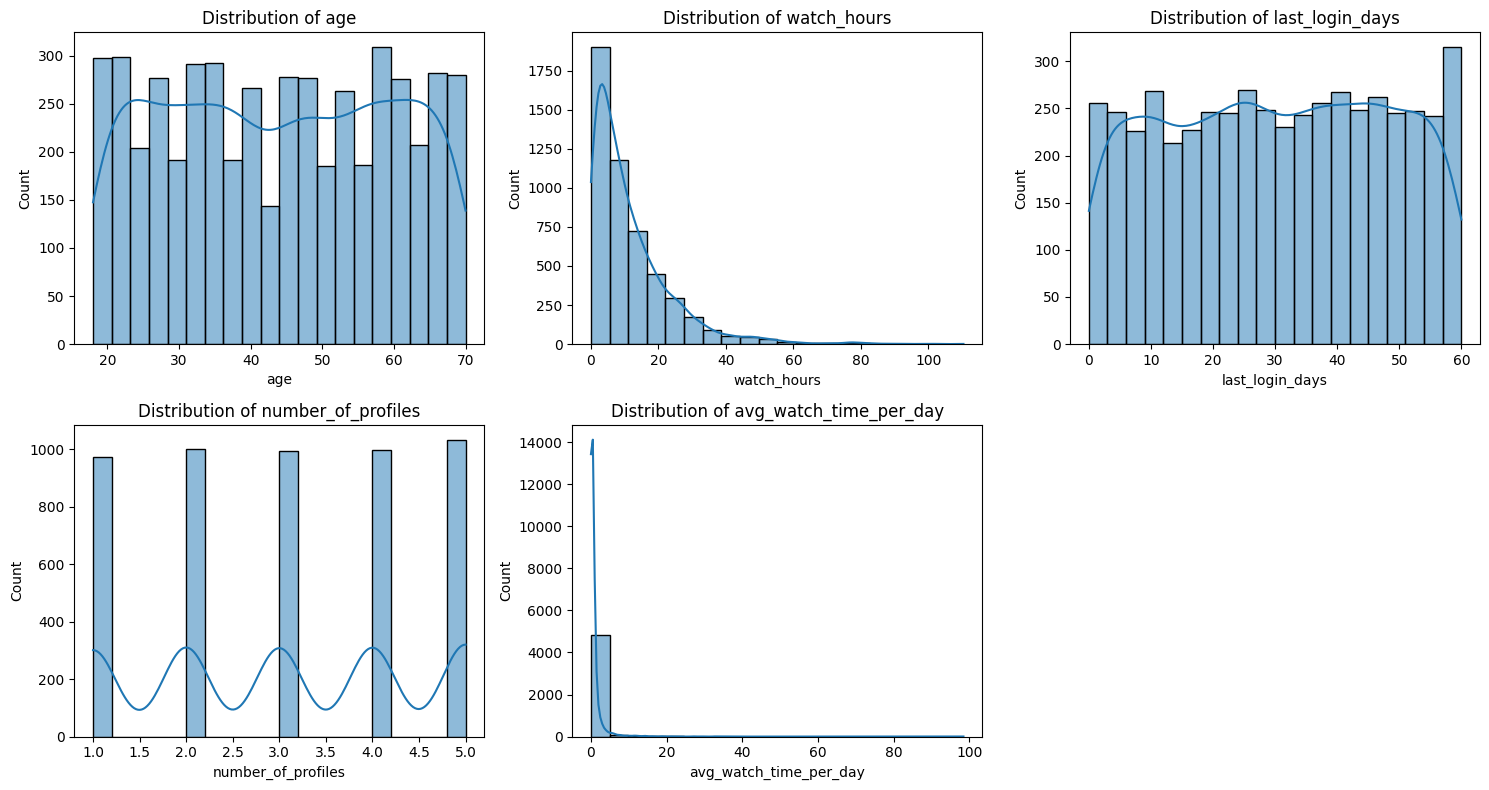

In [ ]:
import math

cols = 3  # plots per row
rows = math.ceil(len(num_cols) / cols)  # auto-adjust row count

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


(0.0, 47.740399999999994)

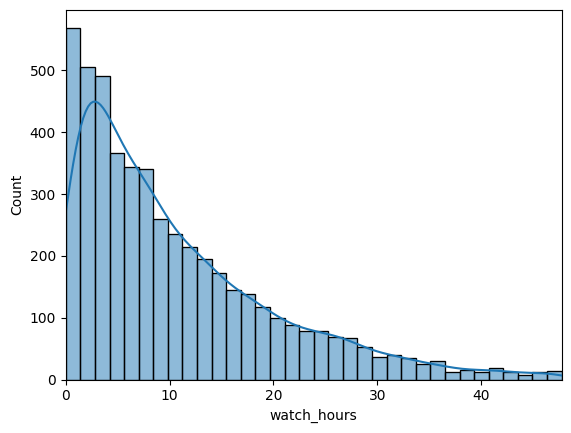

In [ ]:
cap = np.percentile(df["watch_hours"], 98)  # where most users are
sns.histplot(df[df["watch_hours"] <= cap]["watch_hours"], kde=True)
plt.xlim(0, cap)


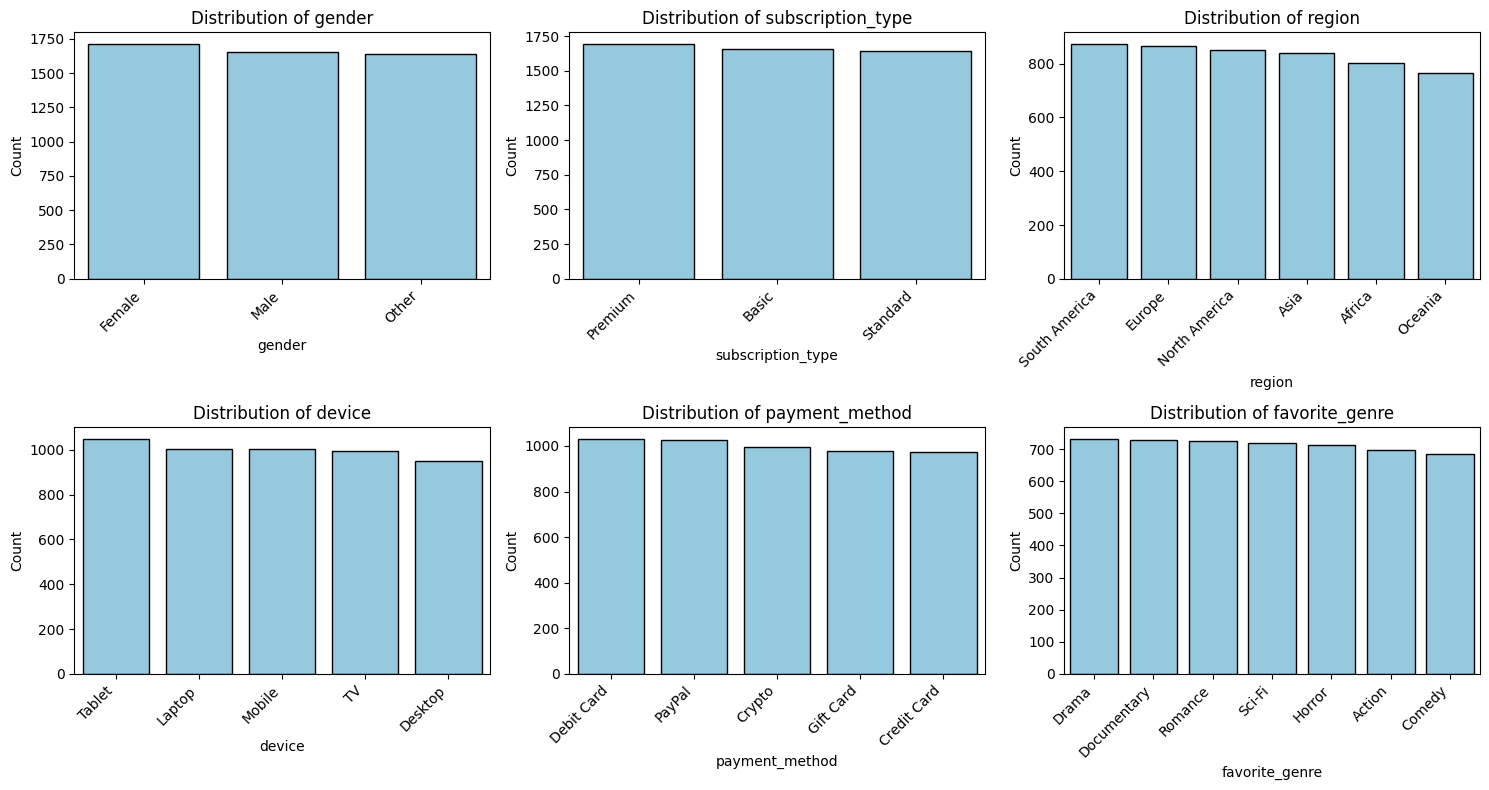

In [ ]:
import math

cols = 3
rows = math.ceil(len(cat_cols) / cols)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    order = df[col].value_counts().index  # sort categories by frequency
    sns.countplot(data=df, x=col, order=order, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


Correlation Heatmap:

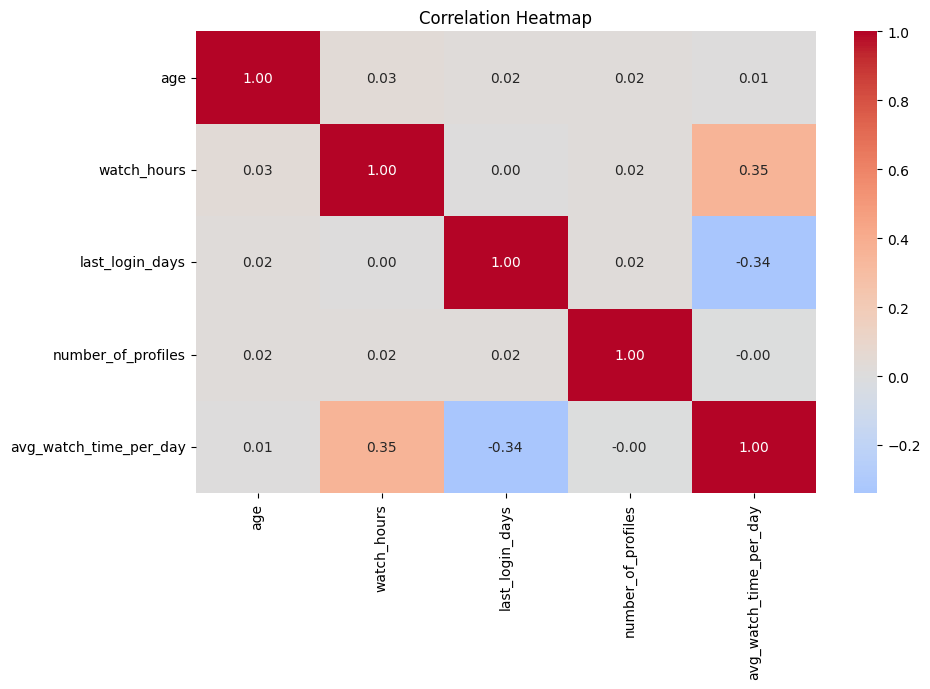

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Heatmap")
plt.show()


Feature Engineering / Binning:

login_bucket
0-7 days      3.758046
8-15 days     1.062802
16-30 days    0.493579
31-45 days    0.302591
60+ days      0.218293
Name: avg_watch_time_per_day, dtype: float64


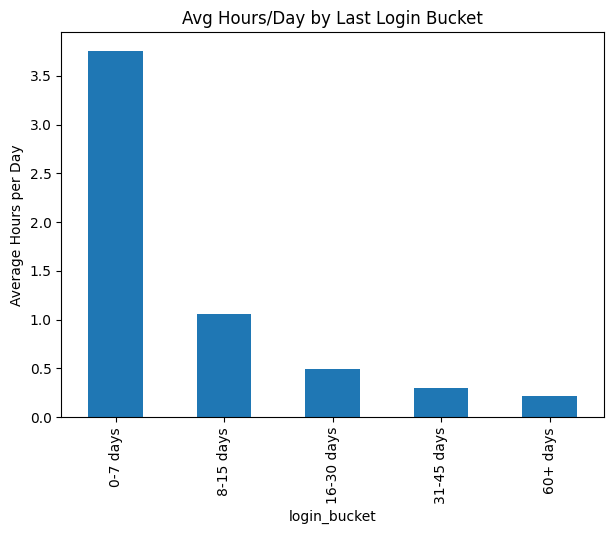

In [ ]:
#  Segmentation: Bucket last_login_days
df["login_bucket"] = pd.cut(
    df["last_login_days"],
    bins=[0, 7, 15, 30, 45, df["last_login_days"].max()],  # cover full range
    labels=["0-7 days", "8-15 days", "16-30 days", "31-45 days", "60+ days"],
    include_lowest=True
)


avg_watch_by_bucket = df.groupby('login_bucket')['avg_watch_time_per_day'].mean()
print(avg_watch_by_bucket)

# Optional: plot segmented averages
avg_watch_by_bucket.plot(kind='bar', figsize=(7,5), title="Avg Hours/Day by Last Login Bucket")
plt.ylabel("Average Hours per Day")
plt.show()

In [ ]:
# Define bins & labels
bins = [18, 25, 35, 45, 55, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "56-70"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels,  include_lowest=True,
                         right=True)

# Check distribution
print(df["age_group"].value_counts())

age_group
56-70    1451
26-35     949
46-55     919
36-45     880
18-25     801
Name: count, dtype: int64


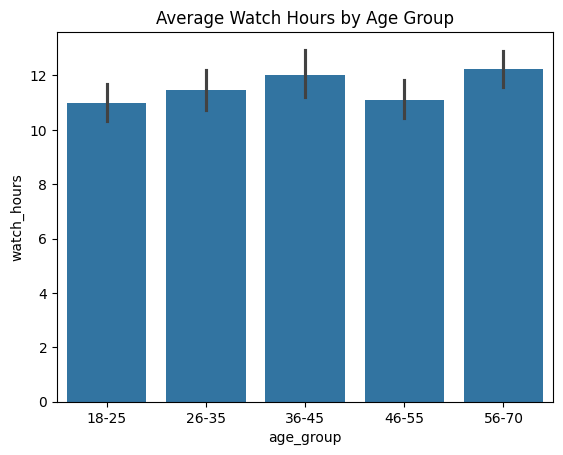

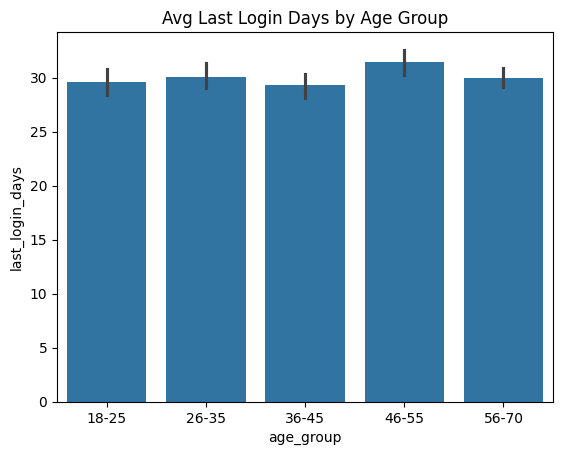

In [ ]:
sns.barplot(x="age_group", y="watch_hours", data=df, estimator="mean")
plt.title("Average Watch Hours by Age Group")
plt.show()

sns.barplot(x="age_group", y="last_login_days", data=df, estimator="mean")
plt.title("Avg Last Login Days by Age Group")
plt.show()


In [ ]:
# Activity status
df['activity_status'] = np.where(df['last_login_days'] <= 7, 'Active',
                          np.where(df['last_login_days'] <= 30, 'Intermittent', 'Dormant'))

activity_status
Active          3.758046
Dormant         0.260595
Intermittent    0.681505
Name: avg_watch_time_per_day, dtype: float64


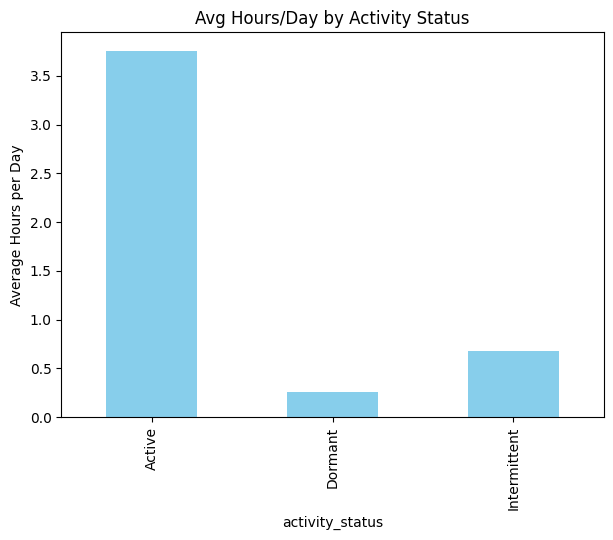

In [ ]:
# Average hours per day by activity_status
activity_stats = df.groupby('activity_status')['avg_watch_time_per_day'].mean()
print(activity_stats)

# Visualize
activity_stats.plot(kind='bar', figsize=(7,5), title="Avg Hours/Day by Activity Status", color='skyblue')
plt.ylabel("Average Hours per Day")
plt.show()

Relationship Visualizations:

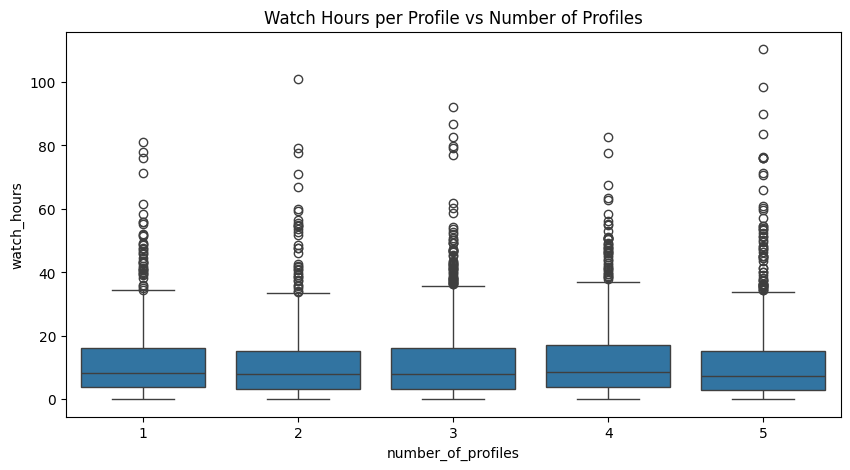

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x="number_of_profiles", y="watch_hours", data=df)
plt.title("Watch Hours per Profile vs Number of Profiles")
plt.show()


In [ ]:
df["watch_hours_per_profile"] = df["watch_hours"] / df["number_of_profiles"]

In [ ]:
df['watch_hours']

,watch_hours
0,14.73
1,0.70
2,16.32
3,4.51
4,1.89
...,...
4995,49.17
4996,9.24
4997,16.55
4998,9.12


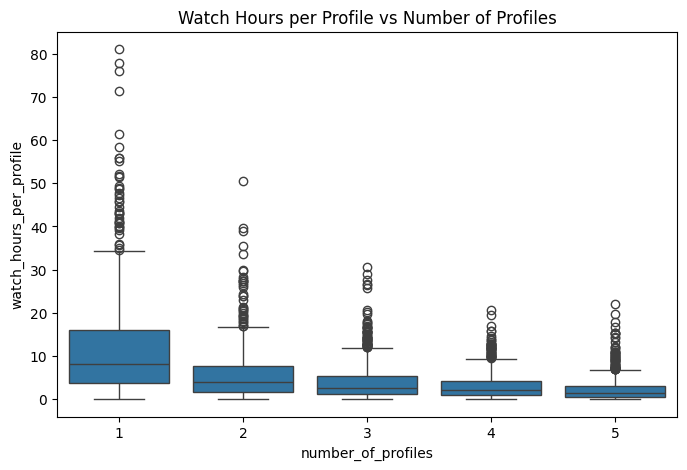

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="number_of_profiles", y="watch_hours_per_profile", data=df)
plt.title("Watch Hours per Profile vs Number of Profiles")
plt.show()


<Axes: xlabel='watch_hours_group', ylabel='count'>

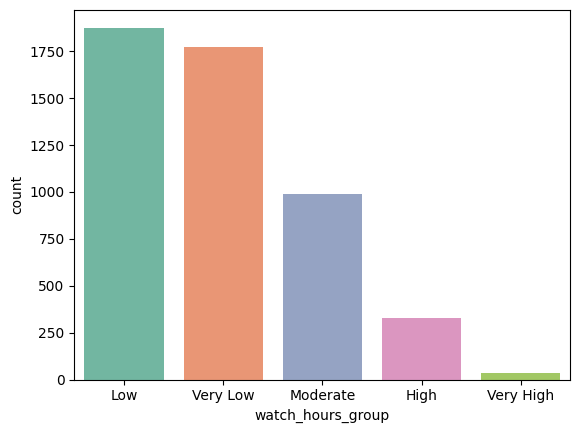

In [ ]:
# Define bins and labels
bins = [0, 5, 15, 30, 60, df["watch_hours"].max()]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

# Create new column
df["watch_hours_group"] = pd.cut(df["watch_hours"], bins=bins, labels=labels,  include_lowest=True,
                         right=True)

# Check distribution
sns.countplot(x="watch_hours_group", data=df, order=df["watch_hours_group"].value_counts().index, palette="Set2")
